# **Data Exploration**
First, let's examine the dataset.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)


In [ ]:
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
print(f'{df.shape=}')
df.info()

df.shape=(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   i

Handling missing values

In [ ]:
# columns with missing value more than 0 and missing value count and percentage
def missing_values_columns(dataFrame):
  missing_values = dataFrame.isnull().sum().to_frame().reset_index()
  missing_values.columns = ['column_name', 'missing_count']
  missing_values['missing_percentage'] = missing_values['missing_count'] / len(dataFrame) * 100
  missing_values = missing_values[missing_values['missing_count'] > 0]
  return missing_values

missing_values = missing_values_columns(df)
print(missing_values.sort_values(by='missing_count', ascending=False))

     column_name  missing_count  missing_percentage
72        PoolQC           1453           99.520548
74   MiscFeature           1406           96.301370
6          Alley           1369           93.767123
73         Fence           1179           80.753425
25    MasVnrType            872           59.726027
57   FireplaceQu            690           47.260274
3    LotFrontage            259           17.739726
58    GarageType             81            5.547945
59   GarageYrBlt             81            5.547945
60  GarageFinish             81            5.547945
63    GarageQual             81            5.547945
64    GarageCond             81            5.547945
35  BsmtFinType2             38            2.602740
32  BsmtExposure             38            2.602740
33  BsmtFinType1             37            2.534247
31      BsmtCond             37            2.534247
30      BsmtQual             37            2.534247
26    MasVnrArea              8            0.547945
42    Electr

In [ ]:
# we will drop column because the id column is not necessary and there are numerous missing values
df = df.drop(['PoolQC','MiscFeature','Id','Alley','Fence','FireplaceQu'], axis=1, errors='ignore')
missing_values = missing_values[missing_values['missing_percentage'] < 30]

In [ ]:
categorical_columns = df.select_dtypes(include='object').columns
numeric_columns = df.select_dtypes(exclude='object').columns

In [ ]:
print(f'{categorical_columns=}')
print(f'{numeric_columns=}')

categorical_columns=Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
numeric_columns=Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fi

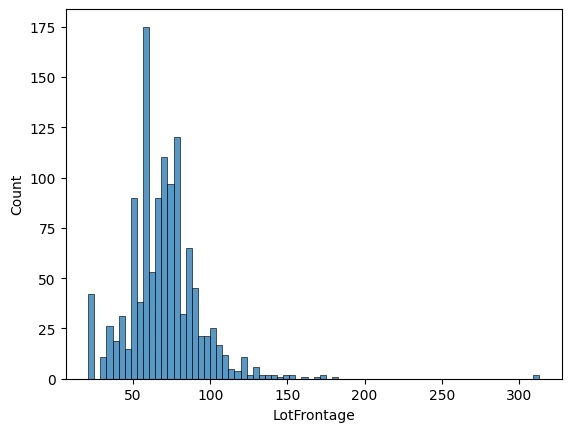

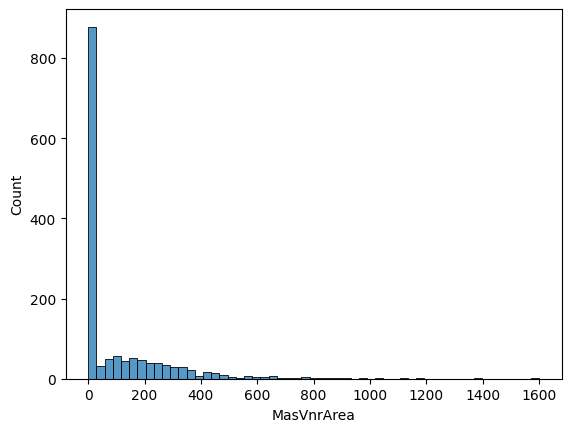

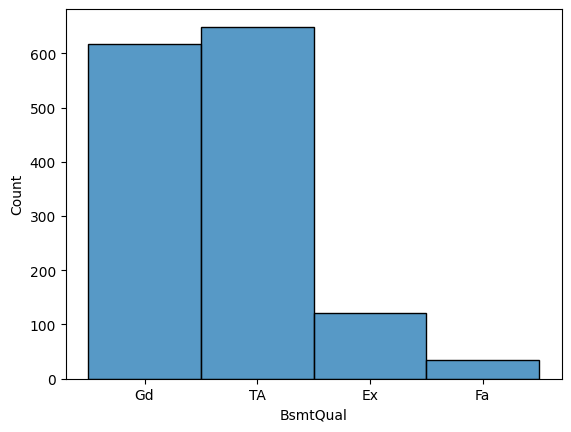

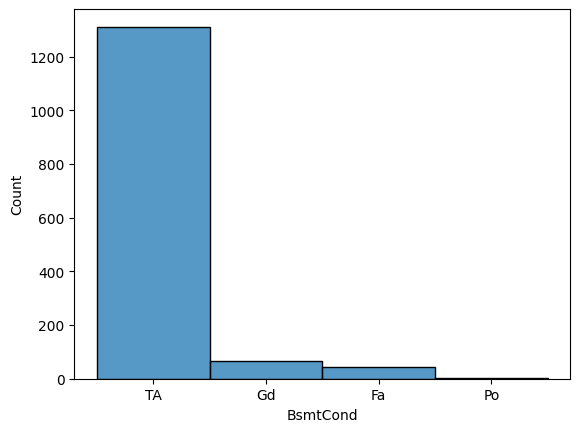

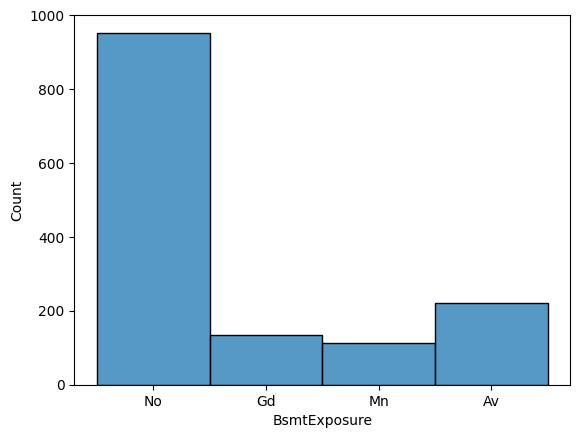

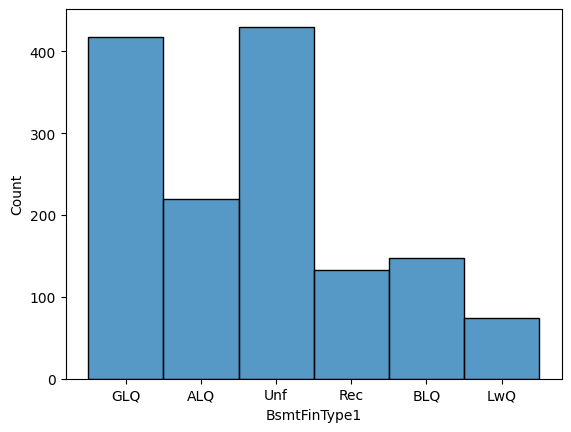

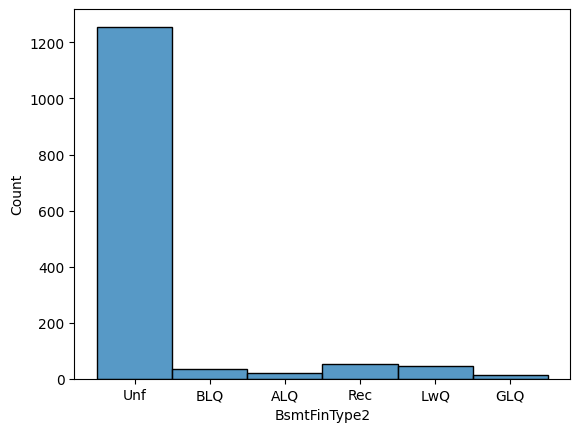

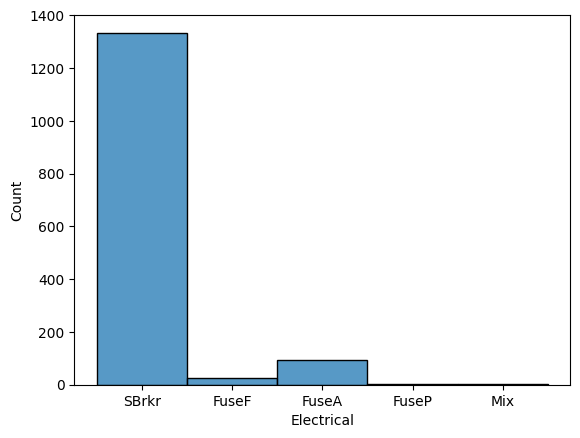

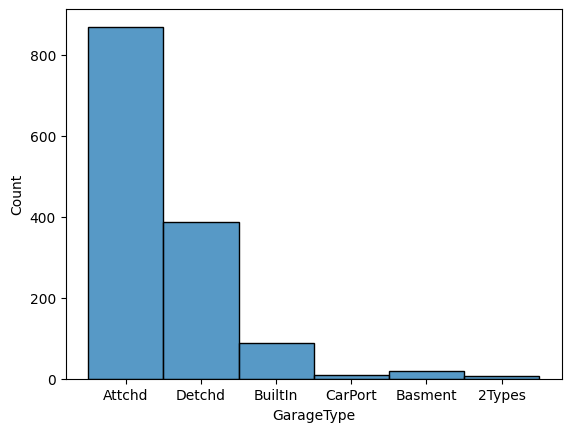

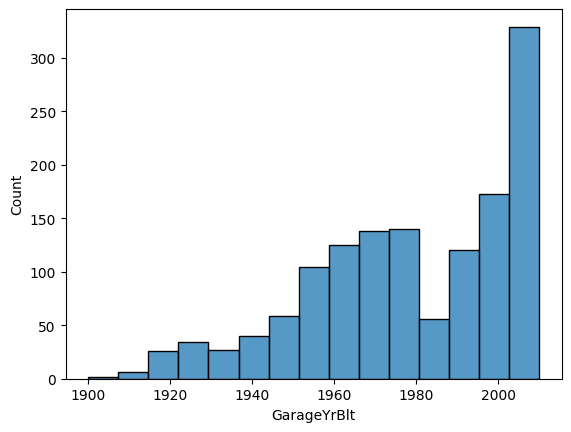

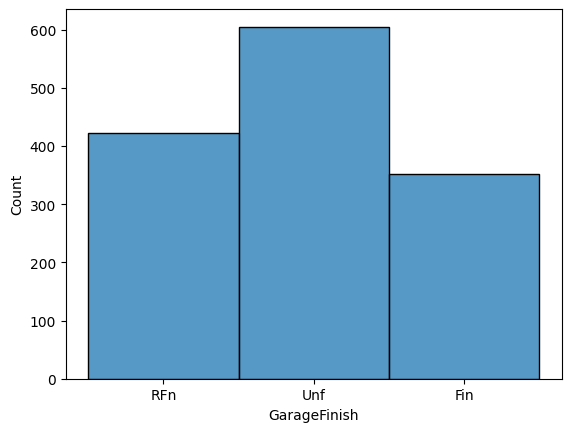

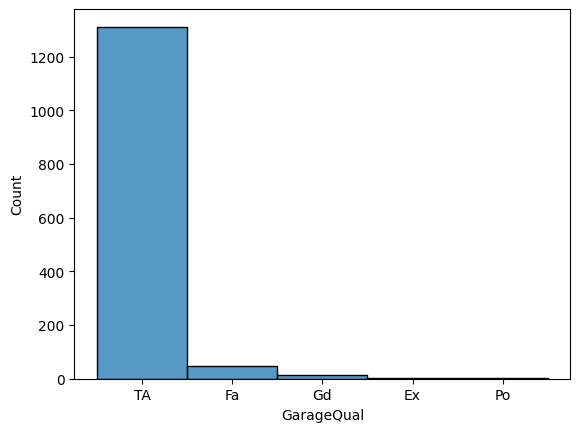

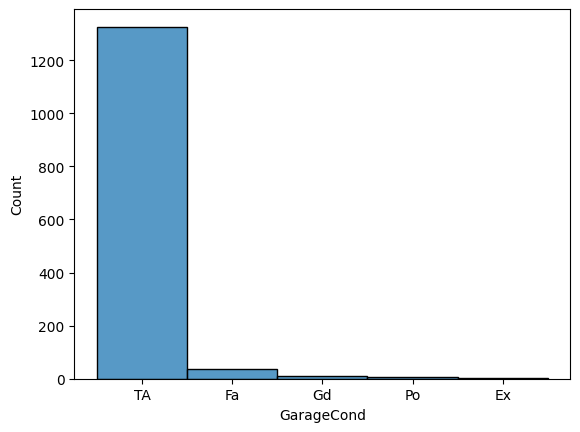

In [ ]:
missing_value_columns = missing_values['column_name'].tolist()
for column in missing_value_columns:
  sns.histplot(data=df, x=column)
  plt.show()


In [ ]:
# fixing missing values
for col in ['GarageYrBlt', 'LotFrontage']:
  df[col] = df[col].fillna(df[col].median())

for col in ('GarageCond', 'GarageType', 'GarageFinish','GarageQual','BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual','MasVnrArea', 'MasVnrType', 'Electrical'):
  df[col] = df[col].fillna(df[col].mode()[0])

missing_values = missing_values_columns(df)
print(missing_values.sort_values(by='missing_count', ascending=False))
# no missing values in dataset now

Empty DataFrame
Columns: [column_name, missing_count, missing_percentage]
Index: []


In [ ]:
# describe cleaned Data
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
for col in ('MiscVal', 'PoolArea', '3SsnPorch'):
  print(df[col].value_counts())

MiscVal
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: count, dtype: int64
PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64
3SsnPorch
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: count, dtype: int64


These columns will be removed because they only provide one value and don't add any new information to our model.

In [ ]:

df = df.drop(['PoolArea','MiscVal','3SsnPorch'], axis=1, errors='ignore')

In [ ]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,15.060959,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,55.757415,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,12.000000,2010.000000,755000.000000


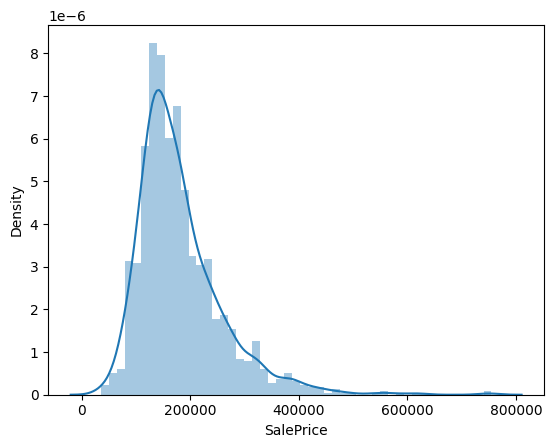

In [ ]:
plt.figure()
sns.distplot(df['SalePrice'])
plt.show()

In [ ]:
#remove outliers from numerical columns
numeric_columns = df.select_dtypes(exclude='object').columns

Q1 = df[numeric_columns].quantile(0.05)
Q3 = df[numeric_columns].quantile(0.95)
IQR = Q3 - Q1

df = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) |(df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

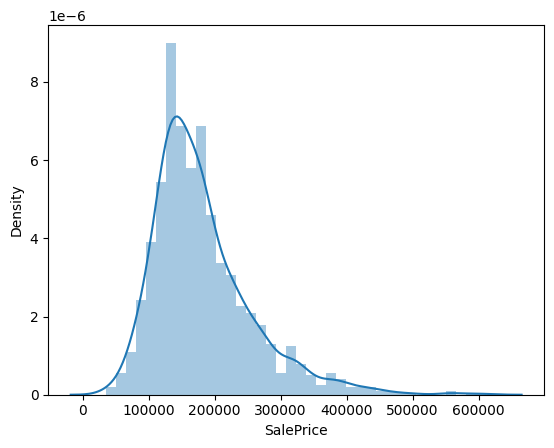

In [ ]:
plt.figure()
sns.distplot(df['SalePrice'])
plt.show()

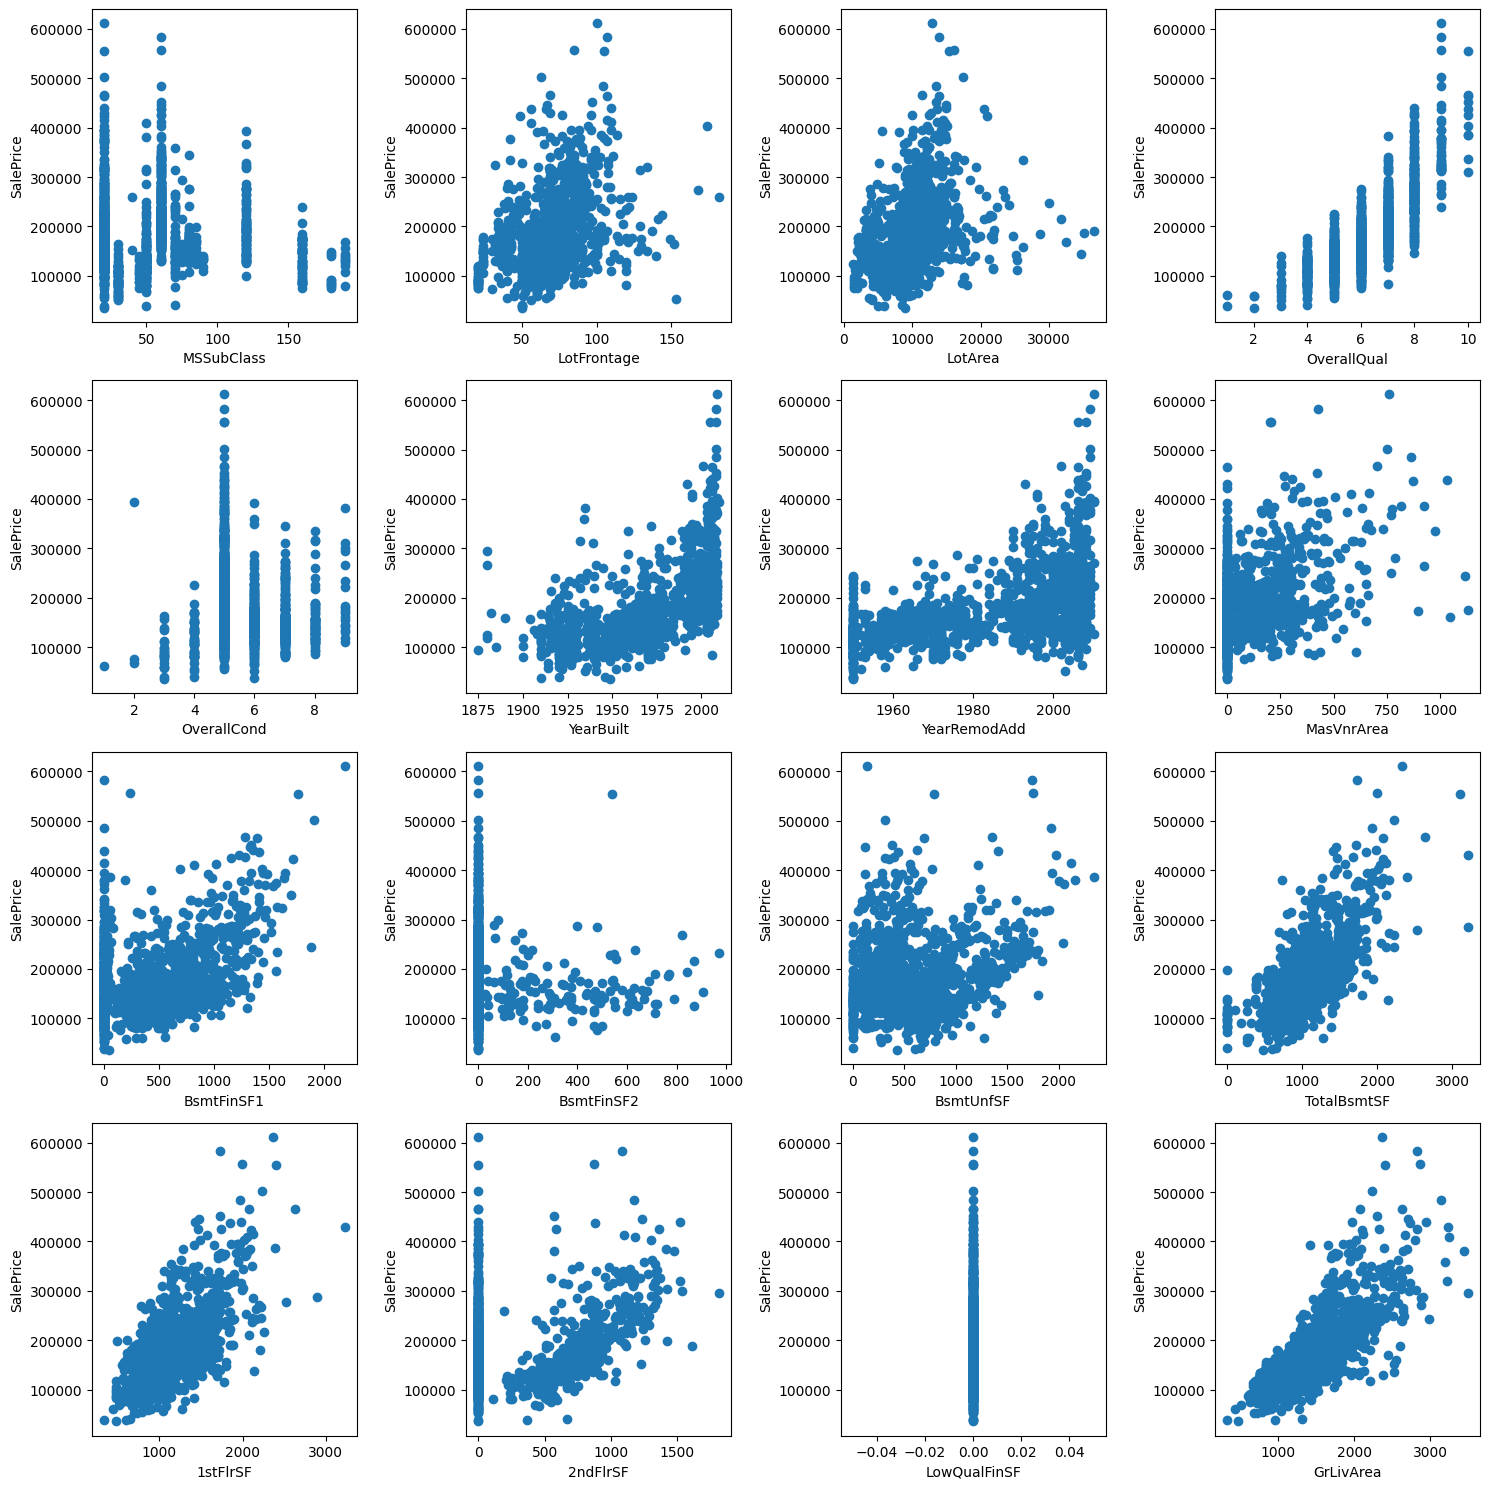

In [ ]:
numeric_columns = df.select_dtypes(exclude='object').columns
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
for i, col in enumerate(numeric_columns[:16]):
  ax = axes[i // 4, i % 4]
  ax.scatter(df[col], df['SalePrice'])
  ax.set_xlabel(col)
  ax.set_ylabel('SalePrice')
  plt.tight_layout()


create indicator variables



In [ ]:
df = pd.get_dummies(df, drop_first=True, dtype=int)
df.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,...,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,2,2008,208500,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,5,2007,181500,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,9,2008,223500,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,2,2006,140000,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,12,2008,250000,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


Dividing the data into sets for testing and training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df, test_df = train_test_split(df, train_size=0.7, random_state=100)
train_scaled = scaler.fit_transform(train_df)
test_scaled = scaler.fit_transform(test_df)

column_names = list(train_df.columns)

train_scaled_df = pd.DataFrame(train_scaled, columns=column_names)
test_scaled_df = pd.DataFrame(train_scaled, columns=column_names)

y_train = train_scaled_df.pop("SalePrice")
X_train = train_scaled_df

y_test = test_scaled_df.pop("SalePrice")
X_test = test_scaled_df


In [ ]:
print(f'{X_train.shape=}')
print(f'{X_test.shape=}')
print(f'{y_train.shape=}')
print(f'{y_test.shape=}')


X_train.shape=(933, 220)
X_test.shape=(933, 220)
y_train.shape=(933,)
y_test.shape=(933,)


In [ ]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,...,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.0,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.0,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,...,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.0,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000
mean,0.205378,0.302164,0.231721,0.570323,0.512785,0.726847,0.595945,0.087246,0.199570,0.041106,0.262083,0.323819,0.276400,0.211918,0.0,0.393010,0.211683,0.025723,0.513040,0.200429,0.468560,0.0,0.438907,0.200429,0.703716,0.440247,0.335644,0.130799,0.125835,0.059408,0.048828,0.485531,0.459003,0.052519,0.008574,0.794212,0.141479,0.996785,0.018221,0.005359,0.632369,0.030011,0.013934,0.915327,0.001072,0.064309,0.026795,0.003215,0.727760,0.043944,...,0.001072,0.001072,0.031083,0.170418,0.001072,0.267953,0.951768,0.013934,0.0,0.001072,0.919614,0.026795,0.420150,0.485531,0.003215,0.017149,0.028939,0.005359,0.001072,0.935691,0.661308,0.016077,0.070740,0.003215,0.247588,0.306538,0.446945,0.032154,0.007503,0.002144,0.957128,0.025723,0.005359,0.004287,0.963558,0.019293,0.923901,0.002144,0.002144,0.004287,0.002144,0.004287,0.091104,0.001072,0.861736,0.001072,0.003215,0.016077,0.818864,0.092176
std,0.237836,0.124117,0.115962,0.146106,0.156588,0.218377,0.342768,0.146703,0.192010,0.144206,0.199624,0.124960,0.125225,0.262058,0.0,0.164803,0.250413,0.112914,0.178687,0.248428,0.122416,0.0,0.151451,0.207075,0.231494,0.178607,0.144605,0.168531,0.166813,0.163045,0.175119,0.248994,0.333436,0.223190,0.092250,0.404493,0.348702,0.056644,0.133821,0.073048,0.482419,0.170708,0.117278,0.278544,0.032739,0.245434,0.161571,0.056644,0.445352,0.205081,...,0.032739,0.032739,0.173634,0.376201,0.032739,0.443130,0.214370,0.117278,0.0,0.032739,0.272035,0.161571,0.493848,0.500059,0.056644,0.129896,0.167725,0.073048,0.032739,0.245434,0

# Model Building and Evaluation

In [ ]:
from sklearn.feature_selection import RFE
lreg = LinearRegression()

rfe = RFE(estimator=lreg, n_features_to_select=100)
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

model_rfe = LinearRegression()
model_rfe.fit(X_train_rfe, y_train)

y_pred_train_rfe = model_rfe.predict(X_train_rfe)
y_pred_test_rfe = model_rfe.predict(X_test_rfe)

r2_square_train_rfe = r2_score(y_train, y_pred_train_rfe)
rss_train_rfe = np.mean((y_train - y_pred_train_rfe) ** 2)
rmse_train_rfe = np.sqrt(rss_train_rfe)

r2_square_test_rfe = r2_score(y_test, y_pred_test_rfe)
rss_test_rfe = np.mean((y_test - y_pred_test_rfe) ** 2)
rmse_test_rfe = np.sqrt(rss_test_rfe)

print("R2-square score (train):", r2_square_train_rfe)
print("RSS (train):", rss_train_rfe)
print("RMSE (train):", rmse_train_rfe)

print("R2-square score (test):", r2_square_test_rfe)
print("RSS (test):", rss_test_rfe)
print("RMSE (test):", rmse_test_rfe)



R2-square score (train): 0.9315398622347257
RSS (train): 0.0011341182646125998
RMSE (train): 0.03367667241003184
R2-square score (test): 0.9315398622347257
RSS (test): 0.0011341182646125998
RMSE (test): 0.03367667241003184


In [ ]:
X_train = X_train[X_train.columns[rfe.support_]]
X_test = X_test[X_test.columns[rfe.support_]]

Text(0.5, 1.0, 'Error distribution')

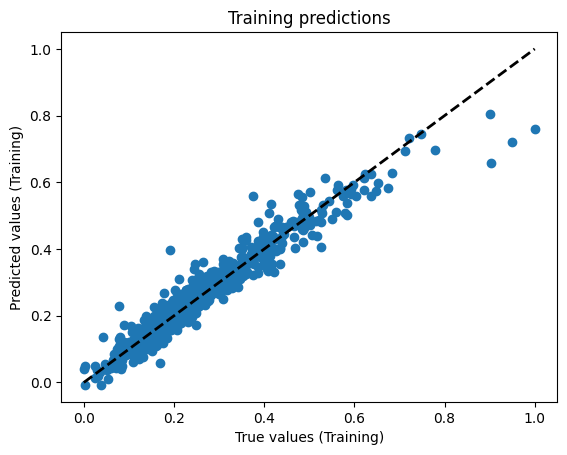

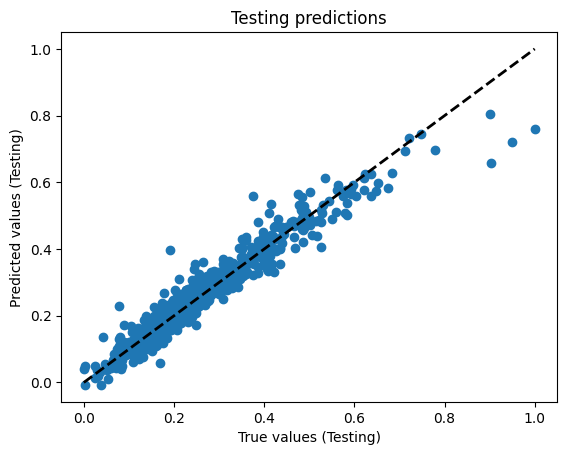

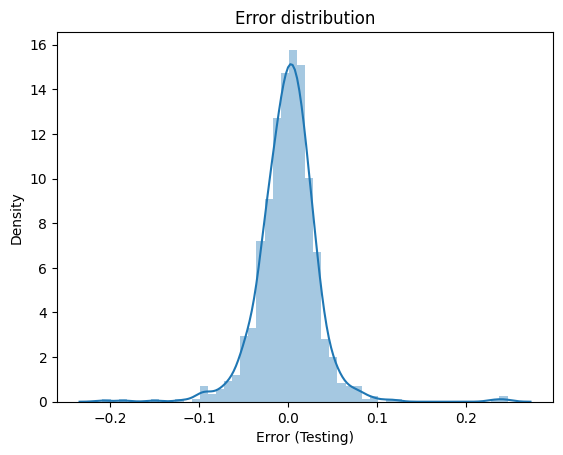

In [ ]:
# Plot the training and testing predictions
plt.figure()
plt.scatter(y_train, y_pred_train_rfe)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('True values (Training)')
plt.ylabel('Predicted values (Training)')
plt.title('Training predictions')

plt.figure()
plt.scatter(y_test, y_pred_test_rfe)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True values (Testing)')
plt.ylabel('Predicted values (Testing)')
plt.title('Testing predictions')

# Plot the error distribution
plt.figure()
sns.distplot((y_test - y_pred_test_rfe), bins=50)
plt.xlabel('Error (Testing)')
plt.title('Error distribution')


In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Define Ridge and Lasso models
ridge = Ridge()
lasso = Lasso()

# Define parameter grids for Ridge and Lasso
r_param = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 1.2, 1.4, 1.5, 1.6]}
l_param = {'alpha': [0.0000001, 0.000001, 0.000005, 0.00001, 0.0001, 0.0005, 0.001]}

# Perform grid search with cross-validation for Ridge and Lasso
grid_search_ridge = GridSearchCV(ridge, r_param, cv=5, scoring='r2', return_train_score=True)
grid_search_lasso = GridSearchCV(lasso, l_param, cv=5, scoring='r2', return_train_score=True)

# Fit the models to the training data
grid_search_ridge.fit(X_train_rfe, y_train)
grid_search_lasso.fit(X_train_rfe, y_train)

# Print the best parameters and scores for Ridge and Lasso
print("Ridge Regression:")
print("Best parameters:", grid_search_ridge.best_params_)
print("Best score:", grid_search_ridge.best_score_)

print("\nLasso Regression:")
print("Best parameters:", grid_search_lasso.best_params_)
print("Best score:", grid_search_lasso.best_score_)

# Predict using the best models
y_pred_test_ridge = grid_search_ridge.best_estimator_.predict(X_test)
y_pred_test_lasso = grid_search_lasso.best_estimator_.predict(X_test)


Ridge Regression:
Best parameters: {'alpha': 1.2}
Best score: 0.9135411186900407

Lasso Regression:
Best parameters: {'alpha': 0.0001}
Best score: 0.9125408159842945


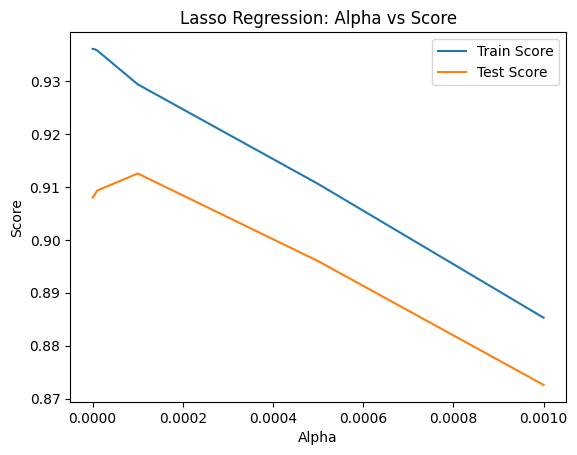

In [ ]:
# Plot alpha vs score for Lasso model
train_score = grid_search_lasso.cv_results_['mean_train_score']
test_score = grid_search_lasso.cv_results_['mean_test_score']
alpha = grid_search_lasso.cv_results_['param_alpha']

plt.figure()
plt.plot(alpha, train_score, label='Train Score')
plt.plot(alpha, test_score, label='Test Score')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('Lasso Regression: Alpha vs Score')
plt.legend()
plt.show()


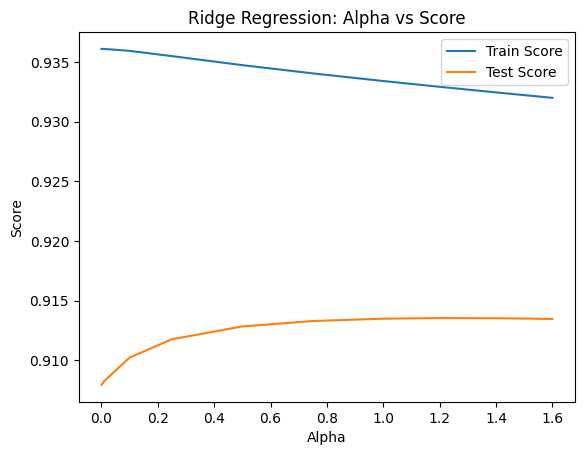

In [ ]:
# Plot alpha vs score for Ridge model
train_score = grid_search_ridge.cv_results_['mean_train_score']
test_score = grid_search_ridge.cv_results_['mean_test_score']
alpha = grid_search_ridge.cv_results_['param_alpha']

plt.figure()
plt.plot(alpha, train_score, label='Train Score')
plt.plot(alpha, test_score, label='Test Score')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('Ridge Regression: Alpha vs Score')
plt.legend()
plt.show()



Evaluation of Ridge Regression:
R2-square score (test): 0.9316989665539559
RSS (test): 0.0011314825247454611
RMSE (test): 0.033637516625718095

Evaluation of Lasso Regression:
R2-square score (test): 0.9274597981933405
RSS (test): 0.001201709059798981
RMSE (test): 0.034665675527803884


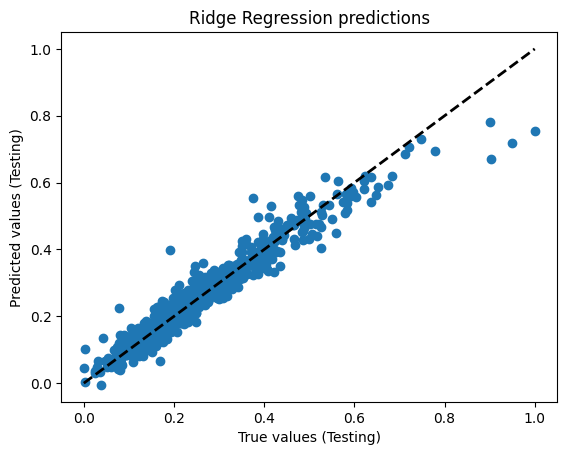

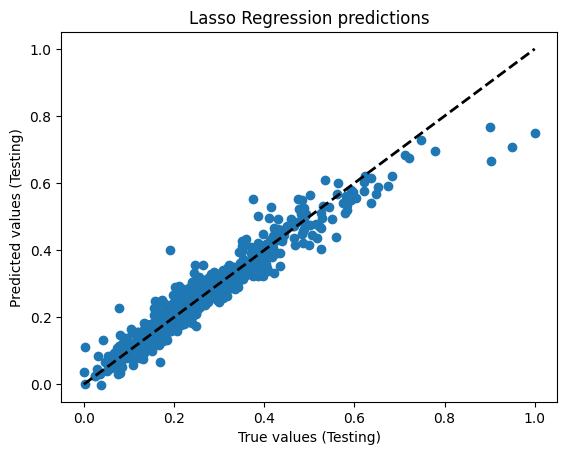

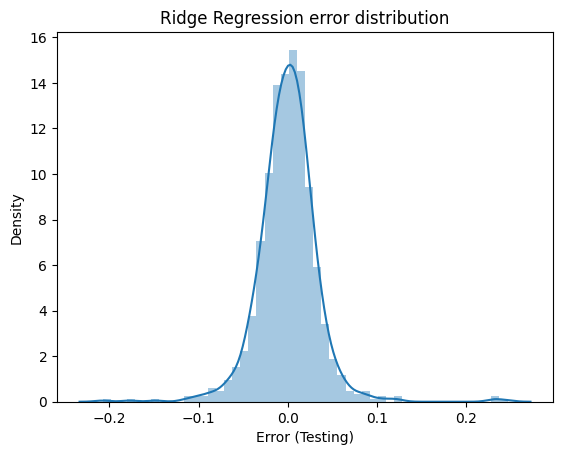

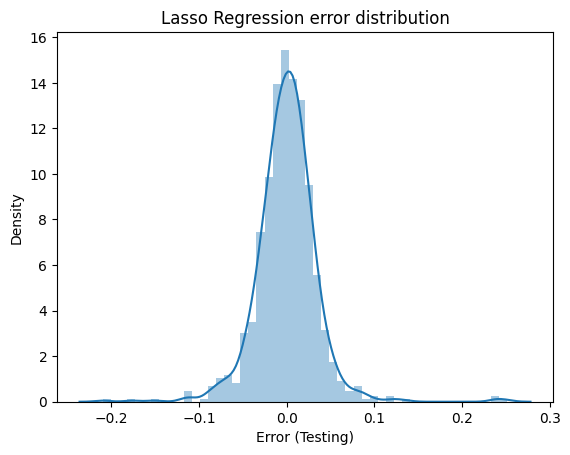

In [ ]:

# Evaluate the predictions
r2_square_test_ridge = r2_score(y_test, y_pred_test_ridge)
rss_test_ridge = np.mean((y_test - y_pred_test_ridge) ** 2)
rmse_test_ridge = np.sqrt(rss_test_ridge)

r2_square_test_lasso = r2_score(y_test, y_pred_test_lasso)
rss_test_lasso = np.mean((y_test - y_pred_test_lasso) ** 2)
rmse_test_lasso = np.sqrt(rss_test_lasso)

print("\nEvaluation of Ridge Regression:")
print("R2-square score (test):", r2_square_test_ridge)
print("RSS (test):", rss_test_ridge)
print("RMSE (test):", rmse_test_ridge)

print("\nEvaluation of Lasso Regression:")
print("R2-square score (test):", r2_square_test_lasso)
print("RSS (test):", rss_test_lasso)
print("RMSE (test):", rmse_test_lasso)

# Plot the predictions and error distribution for Ridge and Lasso
plt.figure()
plt.scatter(y_test, y_pred_test_ridge)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True values (Testing)')
plt.ylabel('Predicted values (Testing)')
plt.title('Ridge Regression predictions')

plt.figure()
plt.scatter(y_test, y_pred_test_lasso)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True values (Testing)')
plt.ylabel('Predicted values (Testing)')
plt.title('Lasso Regression predictions')

plt.figure()
sns.distplot((y_test - y_pred_test_ridge), bins=50)
plt.xlabel('Error (Testing)')
plt.title('Ridge Regression error distribution')

plt.figure()
sns.distplot((y_test - y_pred_test_lasso), bins=50)
plt.xlabel('Error (Testing)')
plt.title('Lasso Regression error distribution')

plt.show()


In [ ]:
# Create a DataFrame to display the coefficients
coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Linear Regression': model_rfe.coef_,
    'Ridge Regression': grid_search_ridge.best_estimator_.coef_,
    'Lasso Regression': grid_search_lasso.best_estimator_.coef_
})

coef_df.head(10)


,Variable,Linear Regression,Ridge Regression,Lasso Regression
0,LotArea,5.205494e-02,0.045356,0.038063
1,OverallQual,1.030157e-01,0.089815,0.103375
2,OverallCond,6.534025e-02,0.060284,0.060043
3,YearBuilt,6.398386e-02,0.060813,0.069819
4,BsmtFinSF1,-2.598479e+10,0.092629,0.064988
5,BsmtFinSF2,-1.075970e+10,0.020875,0.000000
6,BsmtUnfSF,-2.556912e+10,0.027818,0.000000
7,TotalBsmtSF,3.807460e+10,0.087797,0.111238
8,1stFlrSF,-6.005063e+11,0.094914,0.000000
9,2ndFlrSF,-3.342832e+11,0.068670,0.000448


# Question  1

In [ ]:


lasso_selected_variables = np.sum(grid_search_lasso.best_estimator_.coef_ != 0)
print(f"Number of variables selected by Lasso model: {lasso_selected_variables}")


Number of variables selected by Lasso model: 57


In [ ]:
coef_df[['Variable', 'Ridge Regression']].sort_values(by=["Ridge Regression"], ascending=False).head(5)

,Variable,Ridge Regression
11,GrLivArea,0.132682
8,1stFlrSF,0.094914
4,BsmtFinSF1,0.092629
1,OverallQual,0.089815
7,TotalBsmtSF,0.087797


In [ ]:
coef_df[['Variable', 'Lasso Regression']].sort_values(by=["Lasso Regression"], ascending=False).head(5)

,Variable,Lasso Regression
11,GrLivArea,0.270288
7,TotalBsmtSF,0.111238
1,OverallQual,0.103375
3,YearBuilt,0.069819
4,BsmtFinSF1,0.064988


We shall now double the alpha values of Ridge and Lasso and rerun the models.

Alpha for Ridge will be 2 * 1.2 = 2.4
Alpha for Lasso will be 2 * 0.0001 = 0.0002

In [ ]:
ridge = Ridge(alpha=2.4)
lasso = Lasso(alpha=0.0002)

ridge.fit(X_train_rfe, y_train)
lasso.fit(X_train_rfe, y_train)

y_pred_test_ridge = ridge.predict(X_test)
y_pred_test_lasso = lasso.predict(X_test)

r2_square_test_ridge = r2_score(y_test, y_pred_test_ridge)
r2_square_test_lasso = r2_score(y_test, y_pred_test_lasso)

print("R2-square score (test) for Ridge with alpha=2.4:", r2_square_test_ridge)
print("R2-square score (test) for Lasso with alpha=0.0002:", r2_square_test_lasso)

coef_df_with_double_alpha = pd.DataFrame({
    'Variable': X_train.columns,
    'Linear Regression': model_rfe.coef_,
    'Ridge Regression': ridge.coef_,
    'Lasso Regression': lasso.coef_
})

coef_df[['Variable', 'Ridge Regression']].sort_values(by=["Ridge Regression"], ascending=False).head(5)

R2-square score (test) for Ridge with alpha=2.4: 0.9295507905590122
R2-square score (test) for Lasso with alpha=0.0002: 0.9228424794414256


,Variable,Ridge Regression
11,GrLivArea,0.124856
4,BsmtFinSF1,0.089876
8,1stFlrSF,0.089317
1,OverallQual,0.088994
7,TotalBsmtSF,0.083774


In [ ]:
coef_df[['Variable', 'Lasso Regression']].sort_values(by=["Lasso Regression"], ascending=False).head(5)

,Variable,Lasso Regression
11,GrLivArea,0.273547
1,OverallQual,0.114311
7,TotalBsmtSF,0.104308
3,YearBuilt,0.068816
4,BsmtFinSF1,0.066752


# Question 3

In [ ]:
X_train_rfe_new_df = X_train.drop(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'BsmtFinSF1'], axis=1)

new_lasso = Lasso(alpha=0.0001)

new_lasso.fit(X_train_rfe_new_df, y_train)
y_pred_test_lasso = new_lasso.predict(X_test[X_train_rfe_new_df.columns])
r2_square_test_lasso = r2_score(y_test, y_pred_test_lasso)

print("R2-square score (test)", r2_square_test_lasso)
coef_df_with_columns_removed = pd.DataFrame({
    'Variable': X_train_rfe_new_df.columns,
    'Lasso Regression': new_lasso.coef_
})

coef_df_with_columns_removed.sort_values(by=["Lasso Regression"], ascending=False).head(5)

R2-square score (test) 0.9138526640391479


,Variable,Lasso Regression
4,1stFlrSF,0.406985
5,2ndFlrSF,0.146041
32,Neighborhood_StoneBr,0.074317
11,GarageCars,0.072759
28,Neighborhood_NoRidge,0.066160
